In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install imutils

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from imutils.contours import sort_contours
import imutils



You should consider upgrading via the 'C:\Users\rene_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [114]:
train_set.class_indices

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'All data (Compressed)': 12}

In [115]:
label_map = (train_set.class_indices)
label_map

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'All data (Compressed)': 12}

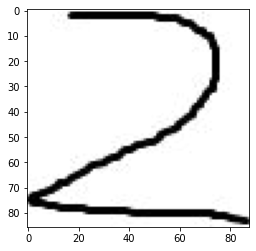

In [116]:
image = cv2.imread('././././data/Unbenannt.JPG')
#image = cv2.resize(image,(300,300))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        chars.append(prediction(roi))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

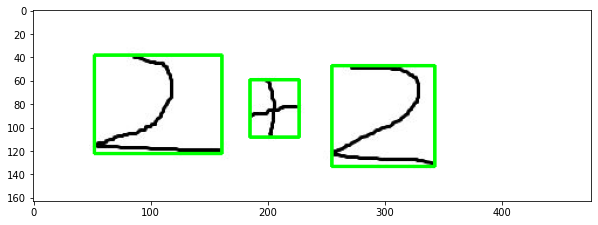

In [117]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [118]:
chars

[('2', array([4], dtype=int64)),
 ('+', array([0], dtype=int64)),
 ('2', array([4], dtype=int64))]

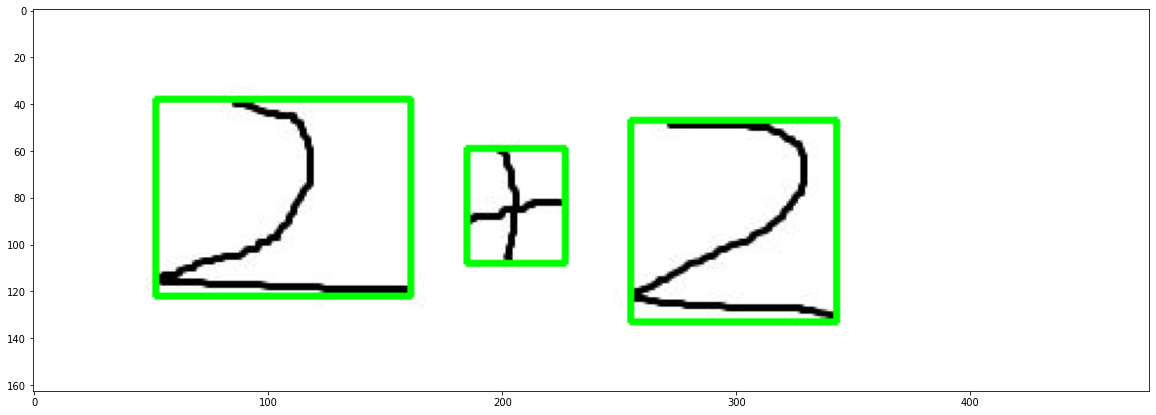

In [119]:
plt.figure(figsize=(20,20))
plt.imshow(image)

In [120]:
labels=[i for i in train_set.class_indices]
print(labels)

['+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'All data (Compressed)']


In [121]:
eq=[]
pos=[]
for i in ((chars)):
    if len(eq)==0 and i[0][0] in labels[3:]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[4:14]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[:4]:
        eq.append(i[0][0])
        pos.append(len(eq))
    else:
        pass

In [122]:
for i in pos:
    if eq[i-1]=='+':
        print(int(''.join(eq[:pos[0]-1]))+int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='%': 
        print(int(''.join(eq[:pos[0]-1]))/int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='*':
        print(int(''.join(eq[:pos[0]-1]))*int(''.join(eq[pos[0]:])))
    else:
        print(int(''.join(eq[:pos[0]-1]))-int(''.join(eq[pos[0]:])))

4
